<a href="https://colab.research.google.com/github/DIWAKAR-V/Classification-project-Health-Insurance-Cross-Sell-Prediction/blob/main/Classification_project_Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

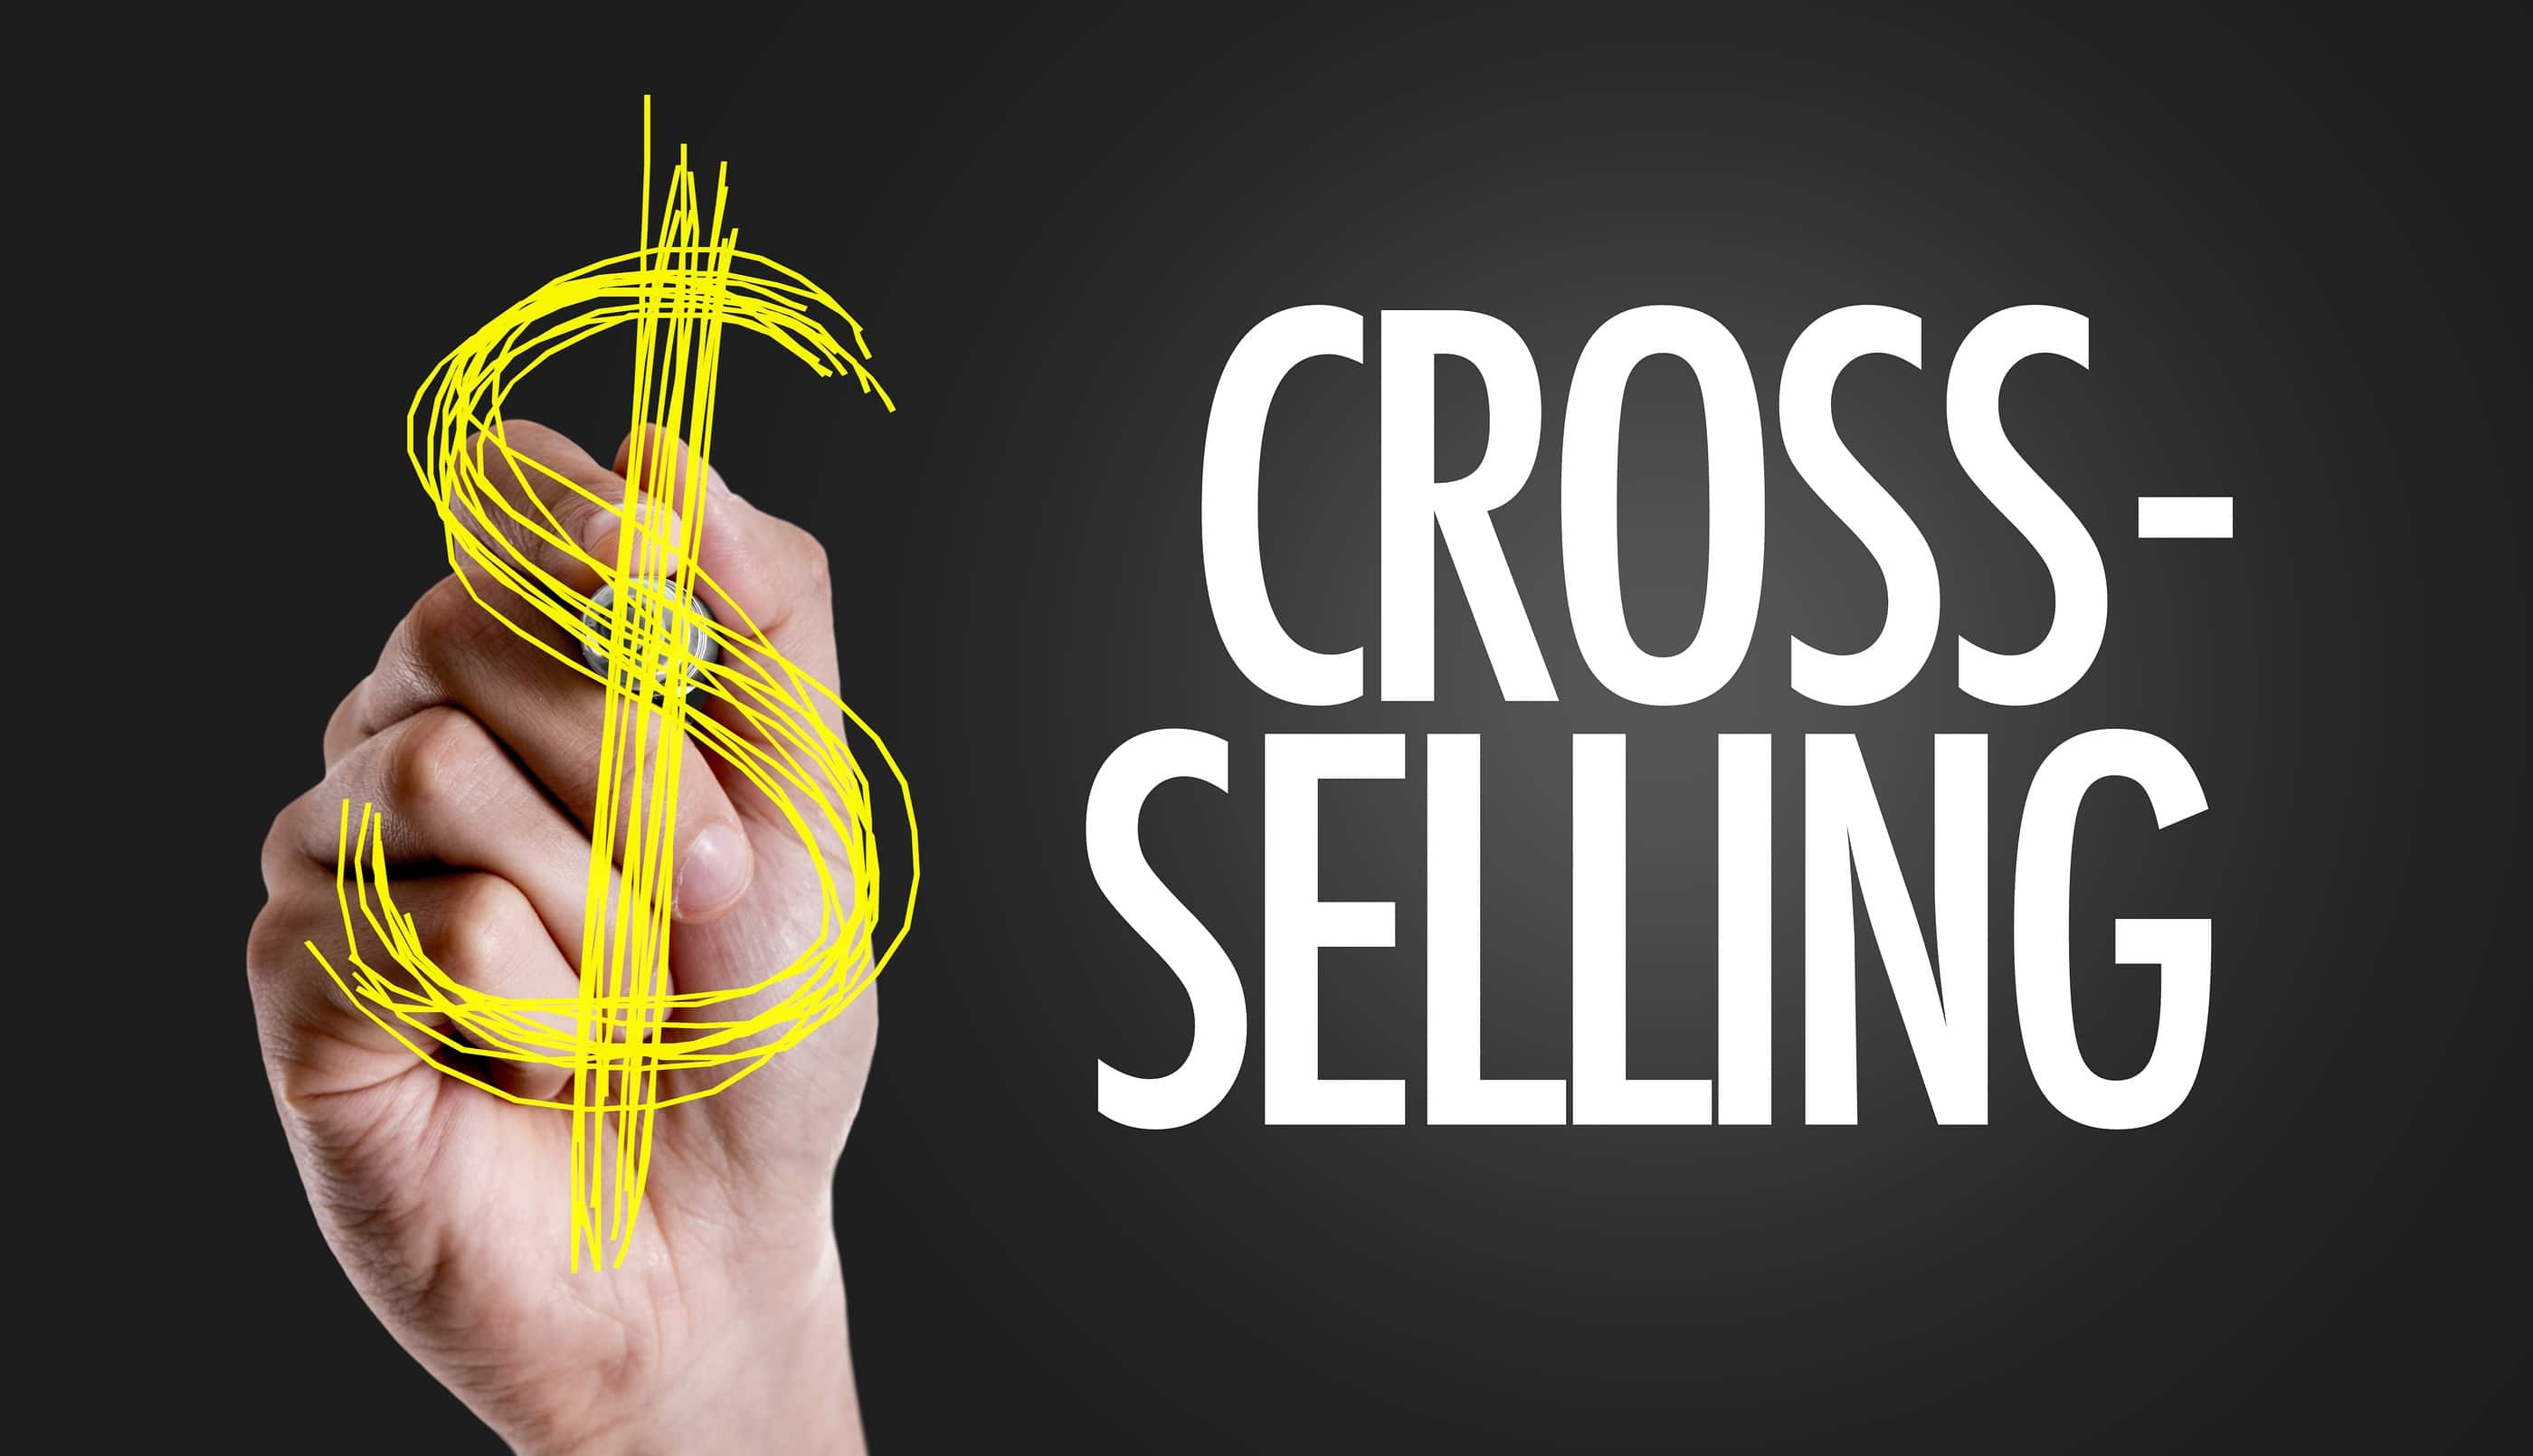

# **Business Context**
<br> Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.
Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

# **Data Description**
<br>In order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.
<br>**Attribute Information**:
<br>**id:**	Unique ID for the customer
<br>**Gender:**	Gender of the customer
<br>**Age:**	Age of the customer
<br>**Driving_License:** 0 : Customer does not have DL, 1 : Customer already has DL
<br>**Region_Code:**	Unique code for the region of the customer
<br>**Previously_Insured:**	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
<br>**Vehicle_Age:**	Age of the Vehicle
<br>**Vehicle_Damage:**	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
<br>**Annual_Premium:**	The amount customer needs to pay as premium in the year
<br>**Policy_Sales_Channel:**	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
<br>**Vintage:**	Number of Days, Customer has been associated with the company
<br>**Response:**	1 : Customer is interested, 0 : Customer is not interested


# **GitHub Link -**
Provide your GitHub Link here :https://github.com/DIWAKAR-V/Classification-project-Health-Insurance-Cross-Sell-Prediction

In [ ]:
#Data Wrangling
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#To measure computation time
import time

#Model Building Prerequisits
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE

#Data Split and Hyperparameter tuning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingRandomSearchCV
from sklearn.experimental import enable_halving_search_cv

#Models used
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


#Evaluation Metrics
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             log_loss,
                             confusion_matrix,
                             classification_report,
                             make_scorer)

#Suppress Future warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Classification ml project/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
data.shape

(381109, 12)

In [ ]:
#checking for null values in dataset
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
#checking for duplicate values in dataset
len(data[data.duplicated()])

0

In [ ]:
data.drop(columns="id",inplace=True) #dropping id column in dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [ ]:
#extracting numerical features from  dataset
numerical_features=data.select_dtypes(exclude="object")
numerical_features=numerical_features.columns.to_list()
numerical_features

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [ ]:
#extracting categorical features from  dataset
categorical_features=data.select_dtypes(include="object")
categorical_features=categorical_features.columns.to_list()
categorical_features

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [ ]:
print("Number of numerical features", len(numerical_features))

Number of numerical features 8


In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Gender and number of categories are 2
The feature is Vehicle_Age and number of categories are 3
The feature is Vehicle_Damage and number of categories are 2


In [ ]:
#finding unique values in each column indidually for knowing discrete and continuous features
for col in data.columns:
    print(f"{col}: ")
    print("")
    print(data[col].unique())
    print("")

Gender: 

['Male' 'Female']

Age: 

[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License: 

[1 0]

Region_Code: 

[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured: 

[0 1]

Vehicle_Age: 

['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage: 

['Yes' 'No']

Annual_Premium: 

[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel: 

[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54

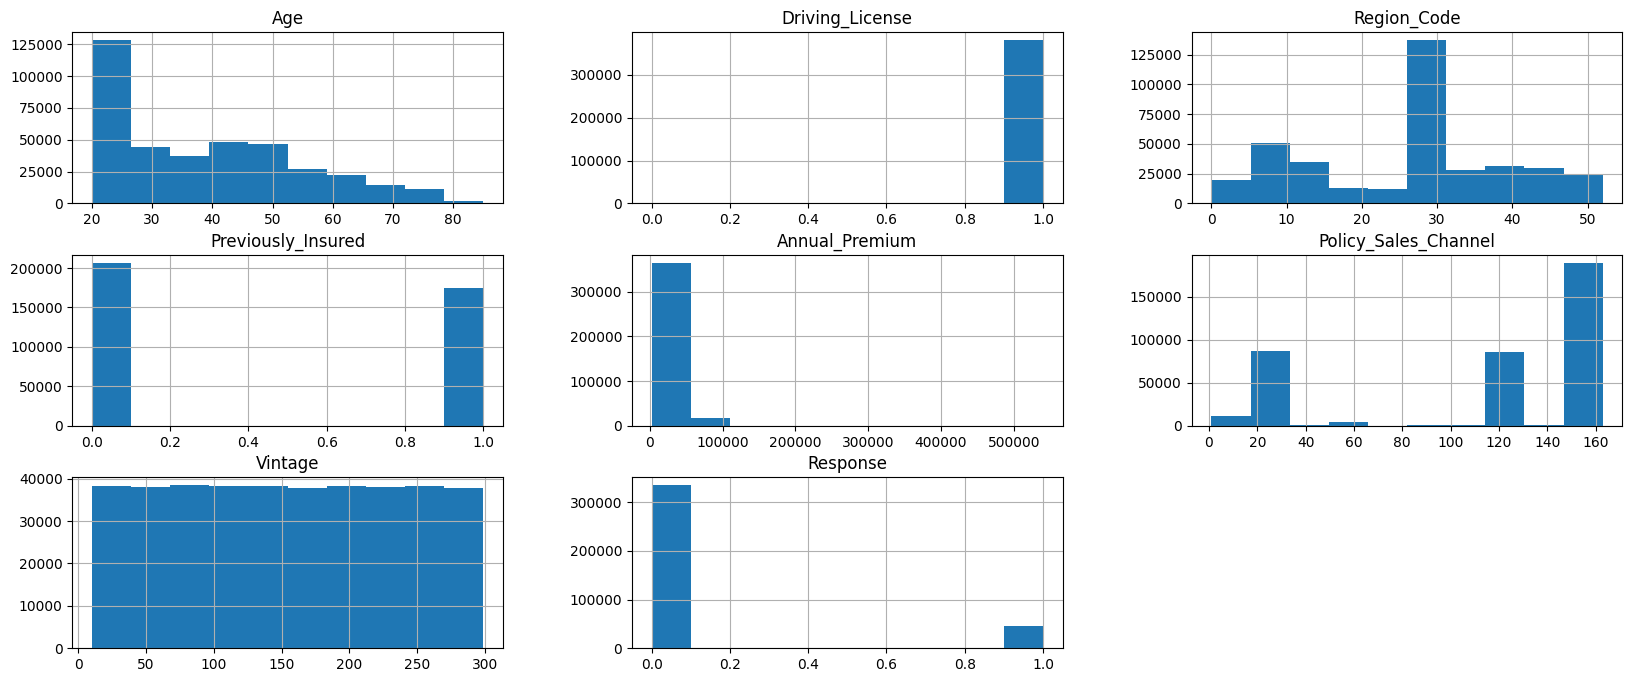

In [ ]:
#plotting our dataset to view the distribution of each features
data.hist(figsize=(20,8))

plt.show()

In [ ]:
discrete_features = [i for i in data.columns if data[i].nunique() <= 3]

print('Discrete Features: ', discrete_features)

continuous_features = [i for i in data.columns if i not in discrete_features]

print('Continuous Features: ', continuous_features)

Discrete Features:  ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
Continuous Features:  ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


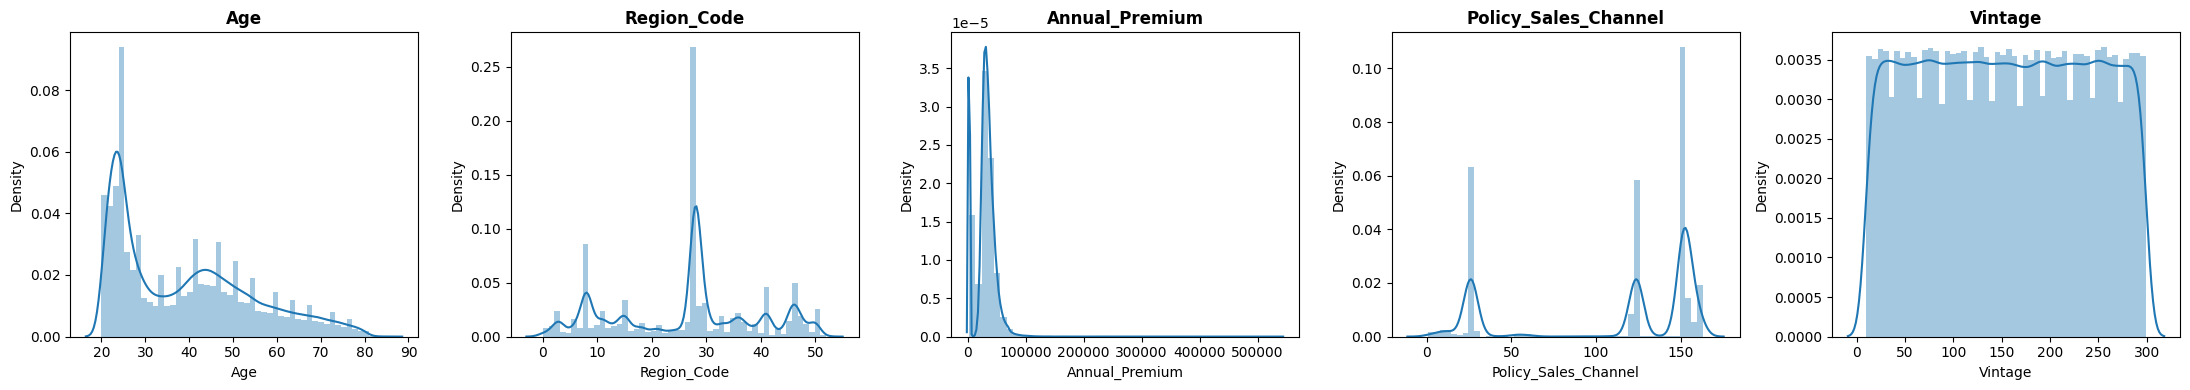

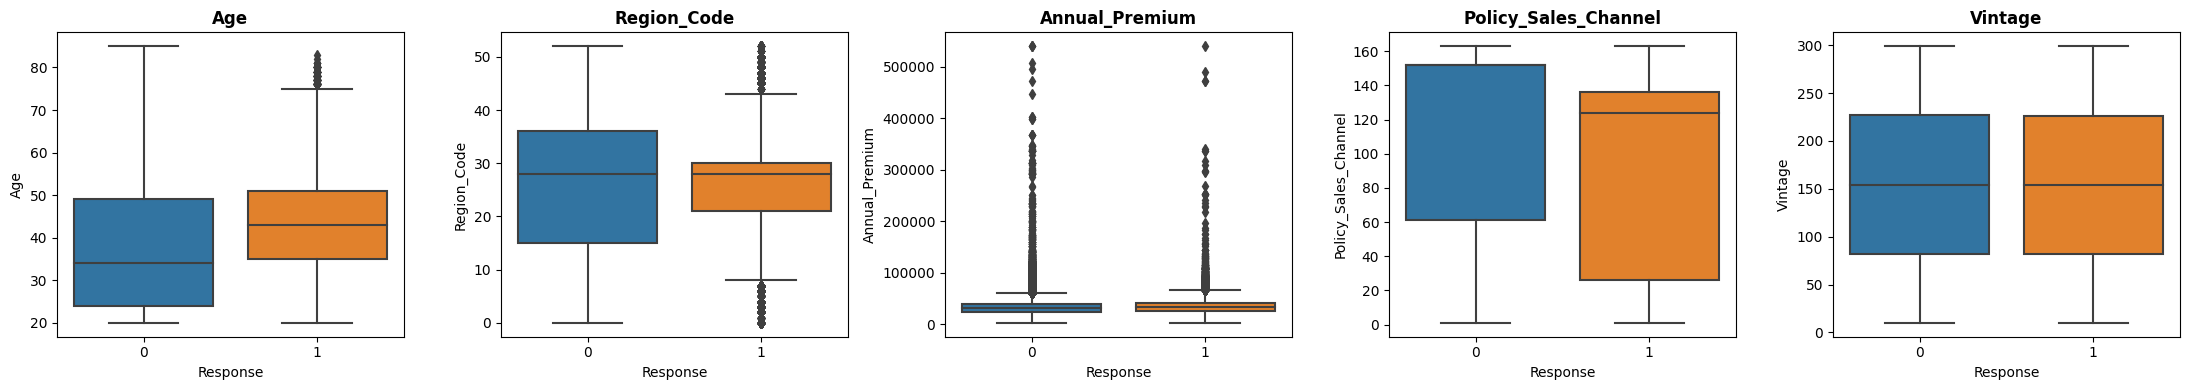

In [ ]:
# Plotting Distributions
plt.figure(figsize=(22,4))
for n,column in enumerate(continuous_features):
  plt.subplot(1, 5, n+1)
  sns.distplot(data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

#Boxplots for detecting outliers
plt.figure(figsize=(22,4))
for n,column in enumerate(continuous_features):
  plt.subplot(1, 5, n+1)
  sns.boxplot(x=data['Response'], y=data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:

#Defining Median, Q1 and Q3 for 'Annual_Premium' column
q1, q3, median = data['Annual_Premium'].quantile([0.25,0.75,0.5])

#Finding upper and lower limits
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)

#Applying quantiles to Annual_Premium feature to treat outliers
data['Annual_Premium'] = np.where(data['Annual_Premium'] > upper_limit,
                                  median,np.where(
                            data['Annual_Premium'] < lower_limit,median,data['Annual_Premium']))

Text(0.5, 1.0, 'Annual_Premium')

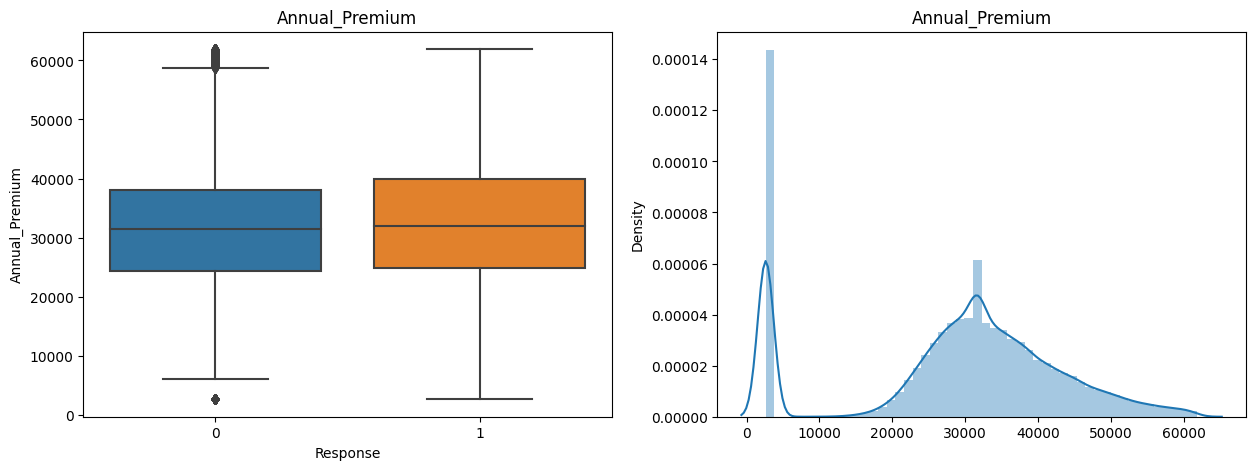

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x=data['Response'], y=data['Annual_Premium']).set_title('Annual_Premium')
sns.distplot(ax = axes[1], x=data['Annual_Premium']).set_title('Annual_Premium')


<Axes: >

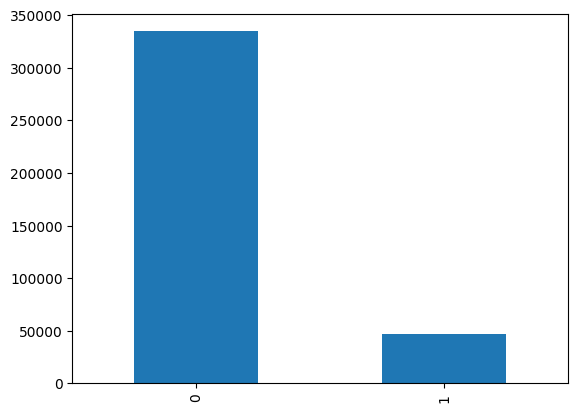

In [ ]:
data['Response'].value_counts().plot(kind="bar")

<Axes: >

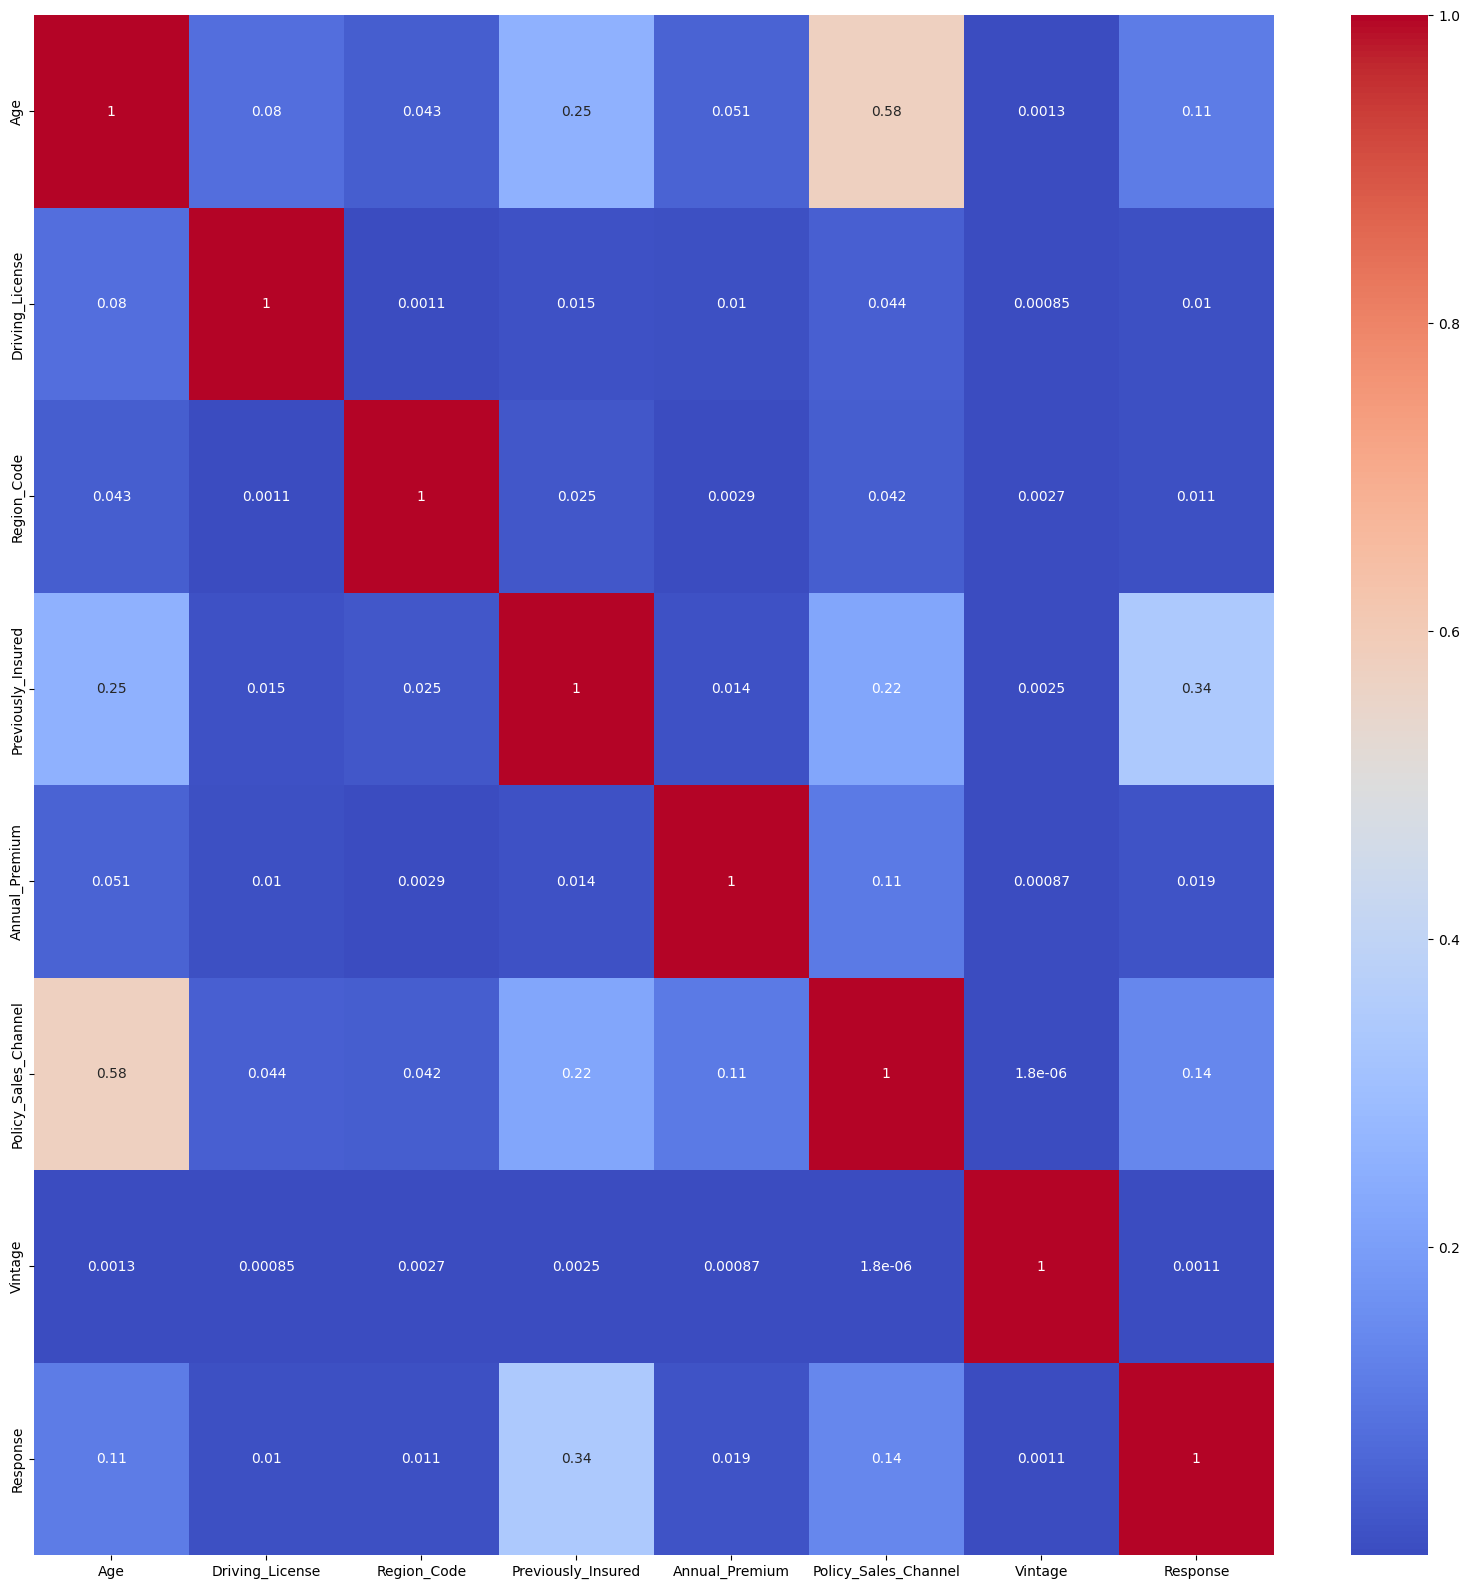

In [ ]:
correlation = data.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**From above heatmap it is clear that our data is free from multicollinearity,so we are taking every features for evaluvation.

## **Feature Engineering :**

In [ ]:
data = pd.get_dummies(data, columns=['Vehicle_Age'])

In [ ]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,Male,44,1,28.0,0,Yes,40454.0,26.0,217,1,0,0,1
1,Male,76,1,3.0,0,No,33536.0,26.0,183,0,1,0,0
2,Male,47,1,28.0,0,Yes,38294.0,26.0,27,1,0,0,1
3,Male,21,1,11.0,1,No,28619.0,152.0,203,0,0,1,0
4,Female,29,1,41.0,1,No,27496.0,152.0,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,No,30170.0,26.0,88,0,1,0,0
381105,Male,30,1,37.0,1,No,40016.0,152.0,131,0,0,1,0
381106,Male,21,1,30.0,1,No,35118.0,160.0,161,0,0,1,0
381107,Female,68,1,14.0,0,Yes,44617.0,124.0,74,0,0,0,1


In [ ]:
# Defining a label encoder based on above data
encoder = {'Gender':{'Male':1, 'Female':0},'Vehicle_Damage':{'Yes':1, 'No': 0}}

# Label Encoding
data = data.replace(encoder)


In [ ]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,30170.0,26.0,88,0,1,0,0
381105,1,30,1,37.0,1,0,40016.0,152.0,131,0,0,1,0
381106,1,21,1,30.0,1,0,35118.0,160.0,161,0,0,1,0
381107,0,68,1,14.0,0,1,44617.0,124.0,74,0,0,0,1


In [ ]:

#Exploring 'Region_Code' feature
data['Region_Code'].value_counts().sort_index()


0.0       2021
1.0       1008
2.0       4038
3.0       9251
4.0       1801
5.0       1279
6.0       6280
7.0       3279
8.0      33877
9.0       3101
10.0      4374
11.0      9232
12.0      3198
13.0      4036
14.0      4678
15.0     13308
16.0      2007
17.0      2617
18.0      5153
19.0      1535
20.0      1935
21.0      4266
22.0      1309
23.0      1960
24.0      2415
25.0      2503
26.0      2587
27.0      2823
28.0    106415
29.0     11065
30.0     12191
31.0      1960
32.0      2787
33.0      7654
34.0      1664
35.0      6942
36.0      8797
37.0      5501
38.0      2026
39.0      4644
40.0      1295
41.0     18263
42.0       591
43.0      2639
44.0       808
45.0      5605
46.0     19749
47.0      7436
48.0      4681
49.0      1832
50.0     10243
51.0       183
52.0       267
Name: Region_Code, dtype: int64

In [ ]:
#Creating a new column 'Region' from 'Region_Code'
data['Region'] = data['Region_Code'].map(lambda x:'A' if 0<=x<=10 else 'B' if 11<=x<=20 else'C' if 21<=x<=30 else
                                             'D' if 31<=x<=40 else 'E')

In [ ]:
data['Region'].value_counts().sort_index()

A     70309
B     47699
C    147534
D     43270
E     72297
Name: Region, dtype: int64

In [ ]:

# One Hot Encoding
data = pd.get_dummies(data, columns=['Region'])

In [ ]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Region_A,Region_B,Region_C,Region_D,Region_E
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1,0,0,1,0,0
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0,1,0,0,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1,0,0,1,0,0
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0,0,1,0,0,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,30170.0,26.0,88,0,1,0,0,0,0,1,0,0
381105,1,30,1,37.0,1,0,40016.0,152.0,131,0,0,1,0,0,0,0,1,0
381106,1,21,1,30.0,1,0,35118.0,160.0,161,0,0,1,0,0,0,1,0,0
381107,0,68,1,14.0,0,1,44617.0,124.0,74,0,0,0,1,0,1,0,0,0


In [ ]:
data.drop(columns=['Driving_License', 'Region_Code'], inplace=True)

In [ ]:
data

,Gender,Age,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Region_A,Region_B,Region_C,Region_D,Region_E
0,1,44,0,1,40454.0,26.0,217,1,0,0,1,0,0,1,0,0
1,1,76,0,0,33536.0,26.0,183,0,1,0,0,1,0,0,0,0
2,1,47,0,1,38294.0,26.0,27,1,0,0,1,0,0,1,0,0
3,1,21,1,0,28619.0,152.0,203,0,0,1,0,0,1,0,0,0
4,0,29,1,0,27496.0,152.0,39,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,0,30170.0,26.0,88,0,1,0,0,0,0,1,0,0
381105,1,30,1,0,40016.0,152.0,131,0,0,1,0,0,0,0,1,0
381106,1,21,1,0,35118.0,160.0,161,0,0,1,0,0,0,1,0,0
381107,0,68,0,1,44617.0,124.0,74,0,0,0,1,0,1,0,0,0


# **Data Preprocessing :**

In [ ]:

#X represents a dataframe with all independant features
X = data.drop(['Response'], axis=1)

#Checking the shape
print(X.shape)

# y represents the target variable
y = data['Response']

#Checking the shape
print(y.shape)

(381109, 15)
(381109,)


In [ ]:

from imblearn.over_sampling import SMOTE
#Defining the resampling technique
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:

#Classes in the predictor variable before resampling
print('Before resampling: ','\n', y.value_counts())

#Classes in the predictor variable after resampling
print('After resampling: ','\n', y_smote.value_counts())



Before resampling:  
 0    334399
1     46710
Name: Response, dtype: int64
After resampling:  
 1    334399
0    334399
Name: Response, dtype: int64


Text(0.5, 1.0, 'Annual_Premium after resampling')

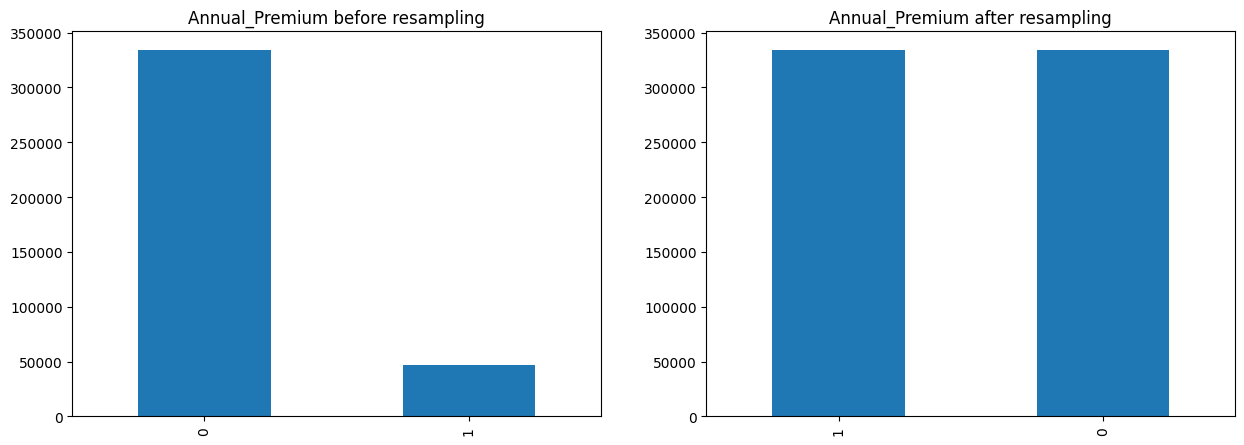

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
y.value_counts().plot(kind="bar",ax = axes[0]).set_title('Annual_Premium before resampling')
y_smote.value_counts().plot(kind="bar",ax = axes[1]).set_title('Annual_Premium after resampling')

In [ ]:
#Splitting the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model implementation:**

In [ ]:
model=RandomForestClassifier().fit(X_train, y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("-"*100)
print(classification_report(y_test, y_pred))
print("-"*100)
print(f"Random Forest Score : {model.score(X_test, y_test)}")

[[60800  5975]
 [ 6977 60008]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     66775
           1       0.91      0.90      0.90     66985

    accuracy                           0.90    133760
   macro avg       0.90      0.90      0.90    133760
weighted avg       0.90      0.90      0.90    133760

----------------------------------------------------------------------------------------------------
Random Forest Score : 0.9031698564593301


In [ ]:
model=GradientBoostingClassifier().fit(X_train, y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("-"*100)
print(classification_report(y_test, y_pred))
print("-"*100)
print(f"Gradient Boosting Score : {model.score(X_test, y_test)}")

[[57030  9745]
 [ 7721 59264]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     66775
           1       0.86      0.88      0.87     66985

    accuracy                           0.87    133760
   macro avg       0.87      0.87      0.87    133760
weighted avg       0.87      0.87      0.87    133760

----------------------------------------------------------------------------------------------------
Gradient Boosting Score : 0.8694228468899522


In [ ]:
model=GaussianNB().fit(X_train, y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("-"*100)
print(classification_report(y_test, y_pred))
print("-"*100)
print(f"naive bayes Score : {model.score(X_test, y_test)}")

[[49957 16818]
 [ 7087 59898]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.75      0.81     66775
           1       0.78      0.89      0.83     66985

    accuracy                           0.82    133760
   macro avg       0.83      0.82      0.82    133760
weighted avg       0.83      0.82      0.82    133760

----------------------------------------------------------------------------------------------------
naive bayes Score : 0.8212843899521531


In [ ]:
model=XGBClassifier().fit(X_train, y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("-"*100)
print(classification_report(y_test, y_pred))
print("-"*100)
print(f"XGBClassifier Score : {model.score(X_test, y_test)}")

[[60743  6032]
 [ 8685 58300]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     66775
           1       0.91      0.87      0.89     66985

    accuracy                           0.89    133760
   macro avg       0.89      0.89      0.89    133760
weighted avg       0.89      0.89      0.89    133760

----------------------------------------------------------------------------------------------------
XGBClassifier Score : 0.889974581339713


In [ ]:
model=DecisionTreeClassifier().fit(X_train, y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("-"*100)
print(classification_report(y_test, y_pred))
print("-"*100)
print(f"Decision Tree Classifier Score : {model.score(X_test, y_test)}")

[[58453  8322]
 [ 6876 60109]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     66775
           1       0.88      0.90      0.89     66985

    accuracy                           0.89    133760
   macro avg       0.89      0.89      0.89    133760
weighted avg       0.89      0.89      0.89    133760

----------------------------------------------------------------------------------------------------
Decision Tree Classifier Score : 0.8863785885167464


In [ ]:
KNeighborsClassifier
model=KNeighborsClassifier().fit(X_train, y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("-"*100)
print(classification_report(y_test, y_pred))
print("-"*100)
print(f"KNeighborsClassifier Score : {model.score(X_test, y_test)}")

[[58302  8473]
 [ 7496 59489]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     66775
           1       0.88      0.89      0.88     66985

    accuracy                           0.88    133760
   macro avg       0.88      0.88      0.88    133760
weighted avg       0.88      0.88      0.88    133760

----------------------------------------------------------------------------------------------------
KNeighborsClassifier Score : 0.8806145334928229


- From above models it is clear that Random Forest Classifier gives the best output with the accuracy score of 90%.

- So we are selecting random forest classifier as best fit model for our dataset.

# **Cross vaidation and Hyperparameter tuning :**

In [ ]:

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 5] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points


random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}


In [ ]:

random_cross_validation = HalvingRandomSearchCV(estimator = RandomForestClassifier(),param_distributions = random_grid, cv = 3, random_state=0, n_jobs = 1)


In [ ]:
random_cross_validation.fit(X_train, y_train)

HalvingRandomSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
                      param_distributions={'bootstrap': [True, False],
                                           'max_depth': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120],
                                           'max_features': ['auto', 'sqrt'],
                                           'min_samples_leaf': [1, 3, 5],
                                           'min_samples_split': [2, 6, 10],
                                           'n_estimators': [5, 20, 50, 100]},
                      random_state=0)

In [ ]:
random_cross_validation.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

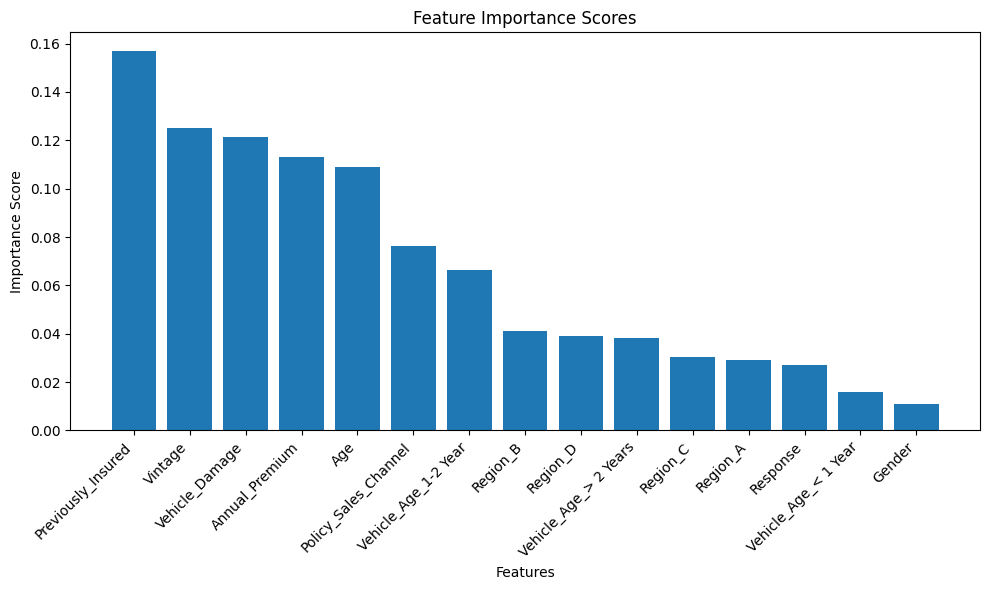

In [ ]:

#from above it is clearly known that RandomForestClassifier model performing well
#clearly viewing the model and finding the important feature
# Training the RandomForestClassifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Get feature importance scores from the trained model
feature_importance =model.feature_importances_

# Get feature names (assuming you have a list of feature names)
feature_names = data.columns

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.tight_layout()
plt.show()

- previously_insured feature is most contributing feature for the model.

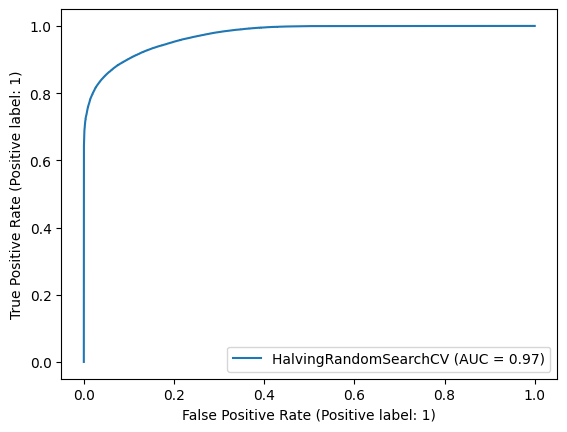

In [ ]:
from sklearn.metrics import RocCurveDisplay
random_cross_validation_disp = RocCurveDisplay.from_estimator(random_cross_validation, X_test, y_test)
plt.show()

- We can observe that Random Forest Classifier is able to discriminate 97% of the records correctly

# **conclusion:**
**Models used:**

1.Random Forest Classifier

2.Gradient Boosting Classifier   

3.Naive bayes classifier

4.knn neighbours classifier   

5.XGBclassifier

6.Decision tree classifier


- **Random Forest Classifier** seems to be performing better as compared to other models and we can consider it to be the best model here for this problem statement.


- **Random Forest Classifier** gives us  **Roc Accuracy Score-97%**,**Accuracy Score-90%**.